In [1]:
# ========================================
# 📘 1. Import Libraries
# ========================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from textblob import TextBlob
from wordcloud import WordCloud
from sklearn.ensemble import RandomForestRegressor

# Display settings
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")


In [4]:

# Step 2: Load both datasets
lyrics_df = pd.read_csv("lyrics_10k.csv")
spotify_df = pd.read_csv("spotify_songs.csv")

# Step 3: Merge datasets based on song title
merged_df = pd.merge(lyrics_df, spotify_df,
                     left_on='song', 
                     right_on='track_name', 
                     how='inner')

print("Merged dataset shape:", merged_df.shape)
merged_df.head()


Merged dataset shape: (3981, 33)


,Unnamed: 0,song_id,artist_id,song,artists,explicit,genres,lyrics_x,track_id,track_name,track_artist,lyrics_y,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,language
0,1,spotify:track:1crTf4RvraCjcPoqsaT9hd,spotify:artist:4P0dddbxPil35MNN9G2MEX,Illusions,['Cypress Hill'],True,chicano rap;gangster rap;hardcore hip hop;hip ...,Illusions Lyrics Some people tell me that I ne...,1crTf4RvraCjcPoqsaT9hd,Illusions,Cypress Hill,NA Some people tell me that I need help Some p...,45,2WPS1YnbXiaX1Ekr1HNICt,The Essential Cypress Hill,2014-10-10,Mexican Gangsta Rap,28Ke4pXWqF2A5b2GfQ1pQt,rap,gangster rap,0.547,0.827,8,-5.975,1,0.3240,0.00728,0.186000,0.084,0.408,182.056,269200,en
1,6,spotify:track:2UuJOEfAUXcD3dYb7eEEZu,spotify:artist:4xRYI6VqpkE3UwrDrAZL8L,Buried Alive,['Logic'],False,conscious hip hop;dmv rap;hip hop;pop rap;rap,Buried Alive Lyrics Tell me how you feel I fee...,7cj7vEylXFN6Lfjj183A3f,Buried Alive,Logic,Tell me how you feel (Tell me how you feel) I ...,1,7crHYSrvEbTpE1v4H2BvXs,Under Pressure (Deluxe),2014-10-21,This Is Logic,37i9dQZF1DWTIuAboZgTMf,rap,hip hop,0.759,0.826,3,-6.627,0,0.0613,0.09770,0.000021,0.275,0.545,139.943,337747,en
2,24,spotify:track:1OqDvYVDhJyFZny7XlfIyZ,spotify:artist:3Nrfpe0tUJi4K4DXYWgMUX,Let Go,['BTS'],False,k-pop;k-pop boy group,Translations English Romanization Let Go Lyric...,0R8tMSvCvkHpiz7DjnBsAw,Let Go,Hillsong Young & Free,I close my eyes and colours fly There's no hid...,43,1IzKxjCQN2dZYpUvTWTQBd,Let Go,2018-05-18,Christian Dance Party,37i9dQZF1DWUUPO0Sbx2CM,pop,dance pop,0.585,0.948,0,-4.572,1,0.1150,0.02090,0.000000,0.063,0.526,125.993,231280,en
3,24,spotify:track:1OqDvYVDhJyFZny7XlfIyZ,spotify:artist:3Nrfpe0tUJi4K4DXYWgMUX,Let Go,['BTS'],False,k-pop;k-pop boy group,Translations English Romanization Let Go Lyric...,3V0W5CfNDMiTKg93wuLFxJ,Let Go,RAC,"(Oh)(You are golden, you are pure) Tell me, te...",53,0pvp7cHQccsevHLhClFbSz,Strangers,2014-01-01,The Sound of Indie Poptimism,7nHgmv7uyIA1KHj6qTttjH,pop,indie poptimism,0.746,0.840,5,-5.891,1,0.0331,0.09170,0.015600,0.351,0.734,110.000,280120,en
4,30,spotify:track:0A0D8EQu5Gl5djlJn8Xym7,spotify:artist:6eU0jV2eEZ8XTM7EmlguK6,Black Cat,['Black Pumas'],False,retro soul,Black Cat Lyrics Like the neighborhood cat ni...,4tYpYYoOI7WDxbCnPninwE,Black Cat,Janet Jackson,"All the lonely nights, I spend alone Never aro...",43,4OD3LU6001esAtFshDX46M,Rhythm Nation 1814,1989-09-19,80s-90s R&B / New Jack Swing / Funk / Dance / ...,3X4HmijjKdwwLonCrOOEAZ,r&b,new jack swing,0.705,0.913,4,-7.253,0,0.0484,0.10300,0.001110,0.216,0.665,114.959,290573,en


In [6]:
merged_df.tail()

,Unnamed: 0,song_id,artist_id,song,artists,explicit,genres,lyrics_x,track_id,track_name,track_artist,lyrics_y,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,language
3976,8673,spotify:track:3DK6m7It6Pw857FcQftMds,spotify:artist:5K4W6rqBFWDnAN6FQUkS6x,Runaway,"['Kanye West', {'label': 'spotify:artist:0ONHk...",True,chicago rap;rap,Translations Türkçe Português English English ...,2NhrdplfGpqU2F4vIKR4Hv,Runaway,Bon Jovi,On the street where you live girls talk about ...,5,0Bkb9wdEeOPBJnLYmQqVR2,Bon Jovi Greatest Hits - The Ultimate Collecti...,2010-01-01,Hard Rock Classics 1967-1991 (Party Edition),1NIX36ZFWEtgXSbSNghoue,rock,hard rock,0.472,0.891,7,-3.651,1,0.0780,0.00620,0.000019,0.1270,0.646,152.436,231627,en
3977,8673,spotify:track:3DK6m7It6Pw857FcQftMds,spotify:artist:5K4W6rqBFWDnAN6FQUkS6x,Runaway,"['Kanye West', {'label': 'spotify:artist:0ONHk...",True,chicago rap;rap,Translations Türkçe Português English English ...,3r7kx6SylBJsVrvTZ2qXuT,Runaway,Pierce Fulton,If nothing is how it used to be Then I don't w...,22,7tIoYjSrzj6IQOO8vqYZhL,Runaway EP,2014-03-31,Vocal House,5PCAWKfUWAUj8VeY8G7xRQ,edm,progressive electro house,0.761,0.756,7,-4.866,1,0.0674,0.00471,0.000230,0.0513,0.799,127.984,271416,en
3978,8673,spotify:track:3DK6m7It6Pw857FcQftMds,spotify:artist:5K4W6rqBFWDnAN6FQUkS6x,Runaway,"['Kanye West', {'label': 'spotify:artist:0ONHk...",True,chicago rap;rap,Translations Türkçe Português English English ...,3VGV3n2Q7WanHnhbvjPjw8,Runaway,Halcyon,Standing on the edge of a cliff Realize there ...,44,1DFjaolVeXHo2ifzdLfLme,Runaway,2017-09-02,EDM TROPICAL,3pS63EDS40FVGYL41zAcU4,latin,tropical,0.395,0.711,7,-5.200,1,0.2950,0.13800,0.000000,0.0992,0.229,149.459,196000,en
3979,8673,spotify:track:3DK6m7It6Pw857FcQftMds,spotify:artist:5K4W6rqBFWDnAN6FQUkS6x,Runaway,"['Kanye West', {'label': 'spotify:artist:0ONHk...",True,chicago rap;rap,Translations Türkçe Português English English ...,6wfjoWlHmqcMIVOCWZsO2P,Runaway,Armin van Buuren,What would this be? If not constantly hollow a...,52,5cqwXF2j9LkvFInBFlnQd3,Balance,2019-10-25,"Festival Music 2019 - Warm Up Music (EDM, Big ...",73uj4YmsC7SJ6SbUMTvf07,edm,progressive electro house,0.645,0.833,11,-4.887,0,0.0532,0.01040,0.000016,0.1240,0.177,125.015,237990,en
3980,8673,spotify:track:3DK6m7It6Pw857FcQftMds,spotify:artist:5K4W6rqBFWDnAN6FQUkS6x,Runaway,"['Kanye West', {'label': 'spotify:artist:0ONHk...",True,chicago rap;rap,Translations Türkçe Português English English ...,7BuSE9uTIw931wtZYzvZcQ,Runaway,Sebastian Yatra,"NA Yatra, Yatra Oh-uoh-uoh-uoh (Yeah-yeah, mm,...",80,0PijZTpKNGUvL12y7w4tZF,Runaway,2019-06-21,Todo Éxitos,2ji5tRQVfnhaX1w9FhmSzk,pop,dance pop,0.756,0.851,2,-3.330,1,0.0674,0.03360,0.000000,0.1260,0.934,75.014,200693,es


In [11]:
# Step 3: Keep necessary columns and rename for clarity
df_clean = merged_df[[
    'song', 'artists', 'lyrics_x', 'genres', 'language', 'track_popularity',
    'danceability', 'energy', 'loudness', 'speechiness',
    'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo'
]].rename(columns={'lyrics_x': 'lyrics'})


In [12]:
# Step 4: Remove rows with missing genres or language
df_clean = df_clean.dropna(subset=['genres', 'language'])
print("After removing missing values:", df_clean.shape)


After removing missing values: (3869, 15)


In [13]:
# Step 5: Clean the lyrics column
def clean_lyrics(text):
    if isinstance(text, str):
        text = text.lower()
        text = re.sub(r'\[.*?\]', '', text)
        text = re.sub(r'[^a-z\s]', '', text)
        text = re.sub(r'\s+', ' ', text)
        return text.strip()
    else:
        return ""

df_clean['lyrics_clean'] = df_clean['lyrics'].apply(clean_lyrics)
print("Lyrics cleaned successfully!")


Lyrics cleaned successfully!


In [14]:
df_clean.head()

,song,artists,lyrics,genres,language,track_popularity,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,lyrics_clean
0,Illusions,['Cypress Hill'],Illusions Lyrics Some people tell me that I ne...,chicano rap;gangster rap;hardcore hip hop;hip ...,en,45,0.547,0.827,-5.975,0.3240,0.00728,0.186000,0.084,0.408,182.056,illusions lyrics some people tell me that i ne...
1,Buried Alive,['Logic'],Buried Alive Lyrics Tell me how you feel I fee...,conscious hip hop;dmv rap;hip hop;pop rap;rap,en,1,0.759,0.826,-6.627,0.0613,0.09770,0.000021,0.275,0.545,139.943,buried alive lyrics tell me how you feel i fee...
2,Let Go,['BTS'],Translations English Romanization Let Go Lyric...,k-pop;k-pop boy group,en,43,0.585,0.948,-4.572,0.1150,0.02090,0.000000,0.063,0.526,125.993,translations english romanization let go lyric...
3,Let Go,['BTS'],Translations English Romanization Let Go Lyric...,k-pop;k-pop boy group,en,53,0.746,0.840,-5.891,0.0331,0.09170,0.015600,0.351,0.734,110.000,translations english romanization let go lyric...
4,Black Cat,['Black Pumas'],Black Cat Lyrics Like the neighborhood cat ni...,retro soul,en,43,0.705,0.913,-7.253,0.0484,0.10300,0.001110,0.216,0.665,114.959,black cat lyrics like the neighborhood cat nig...


In [ ]:
#🎯 USE CASE 1: Theme Classification (Lyrics-based)

C:\Users\BODDAPATI KANCHANA\AppData\Local\Temp\ipykernel_13712\2186587808.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=theme_counts.index, y=theme_counts.values, palette='viridis')


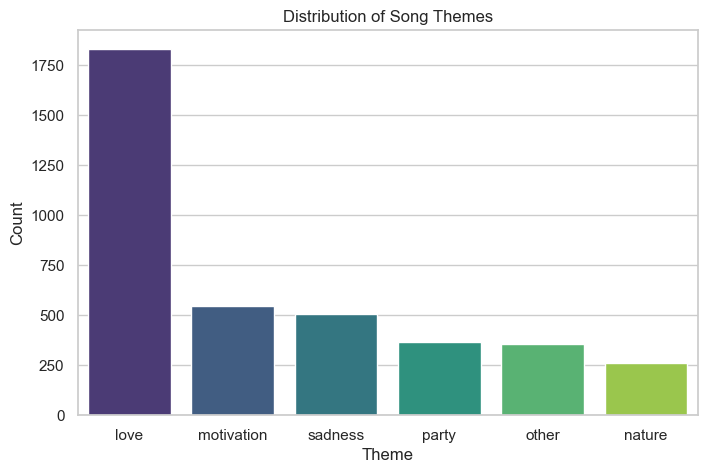

In [16]:

# Step 1: Define keyword-based themes
themes = {
    'love': ['love', 'heart', 'kiss', 'romance', 'darling'],
    'sadness': ['cry', 'tears', 'alone', 'pain', 'miss'],
    'motivation': ['dream', 'believe', 'fight', 'strong', 'hope'],
    'party': ['dance', 'party', 'night', 'club', 'drunk'],
    'nature': ['rain', 'sun', 'sky', 'moon', 'sea']
}

# Step 2: Detect themes from lyrics
def detect_theme(lyrics):
    lyrics = str(lyrics).lower()
    scores = {theme: sum(word in lyrics for word in words) for theme, words in themes.items()}
    return max(scores, key=scores.get) if any(scores.values()) else 'other'

df_clean['theme'] = df_clean['lyrics_clean'].apply(detect_theme)

# Step 3: Count & visualize top themes
import matplotlib.pyplot as plt
import seaborn as sns

theme_counts = df_clean['theme'].value_counts()
plt.figure(figsize=(8,5))
sns.barplot(x=theme_counts.index, y=theme_counts.values, palette='viridis')
plt.title("Distribution of Song Themes")
plt.xlabel("Theme")
plt.ylabel("Count")
plt.show()


In [17]:
#🎵 USE CASE 2: Genre Classification (Based on Audio Features)

In [19]:
# 🧩 USE CASE 2: Genre Classification (Fixed Version)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

import numpy as np

# Step 1: Select features and target
features = ['danceability', 'energy', 'loudness', 'speechiness',
            'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

X = df_clean[features]
y = df_clean['genres']

# Step 2: Remove rare genres (those with < 5 songs)
genre_counts = y.value_counts()
valid_genres = genre_counts[genre_counts >= 5].index
df_genre_filtered = df_clean[df_clean['genres'].isin(valid_genres)]

# Update X and y after filtering
X = df_genre_filtered[features]
y = df_genre_filtered['genres']

# Step 3: Encode labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Step 4: Split train/test safely
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# Step 5: Train Random Forest
model = RandomForestClassifier(n_estimators=200, max_depth=15, random_state=42, class_weight='balanced')
model.fit(X_train, y_train)

# Step 6: Evaluate model
y_pred = model.predict(X_test)
print("✅ Genre Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=le.classes_))


✅ Genre Classification Report:

                                                                                                                                                precision    recall  f1-score   support

                                                                               acoustic pop;alternative roots rock;indie folk;stomp and holler       0.60      0.75      0.67         4
                                                acoustic pop;folk;indie pop;lilith;modern folk rock;neo mellow;new americana;singer-songwriter       0.00      0.00      0.00         5
                                                                            adult standards;contemporary vocal jazz;lounge;neo soul;vocal jazz       0.75      1.00      0.86         3
                                                                                              adult standards;easy listening;lounge;vocal jazz       0.00      0.00      0.00         4
                                               

C:\Users\BODDAPATI KANCHANA\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\BODDAPATI KANCHANA\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\BODDAPATI KANCHANA\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


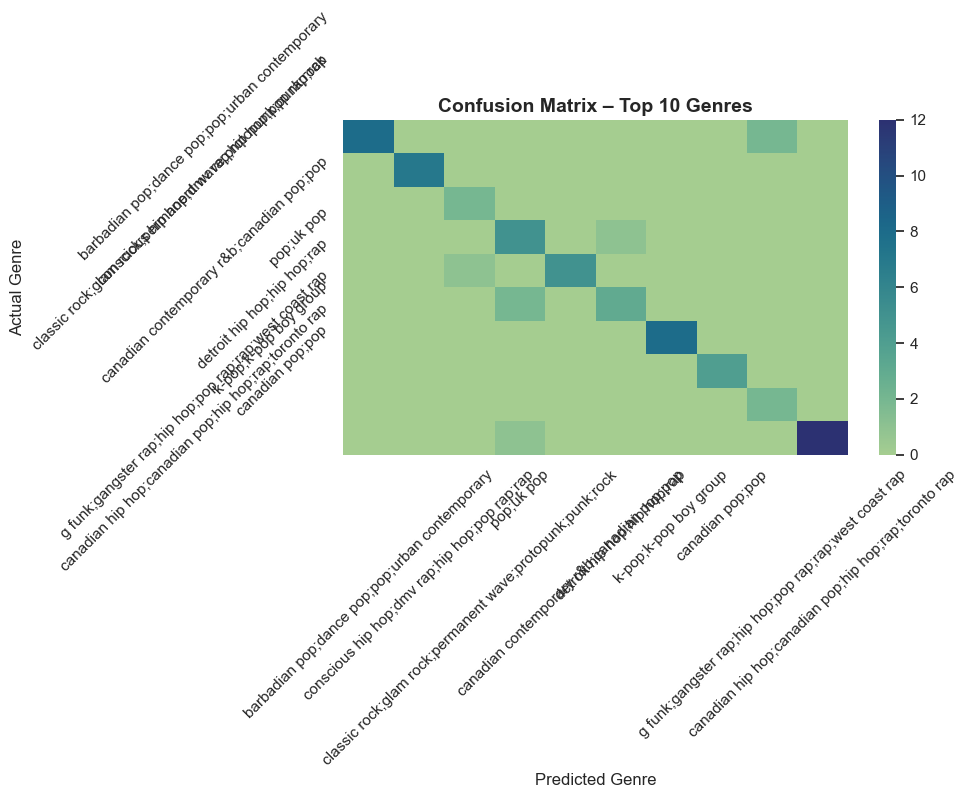

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

# Get top 10 most common genres for visualization
top_genres = df_genre_filtered['genres'].value_counts().nlargest(10).index
mask = y_test < len(le.classes_)
y_test_filtered = y_test[mask]
y_pred_filtered = y_pred[mask]

# Filter only top genres
indices = [i for i, genre in enumerate(le.classes_) if genre in top_genres]
cm = confusion_matrix(y_test, y_pred, labels=indices)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=False, cmap="crest", xticklabels=top_genres, yticklabels=top_genres)
plt.title("Confusion Matrix – Top 10 Genres", fontsize=14, fontweight='bold')
plt.xlabel("Predicted Genre")
plt.ylabel("Actual Genre")
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\BODDAPATI KANCHANA\AppData\Local\Temp\ipykernel_13712\3531781349.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=lang_popularity.values, y=lang_popularity.index, palette="viridis")


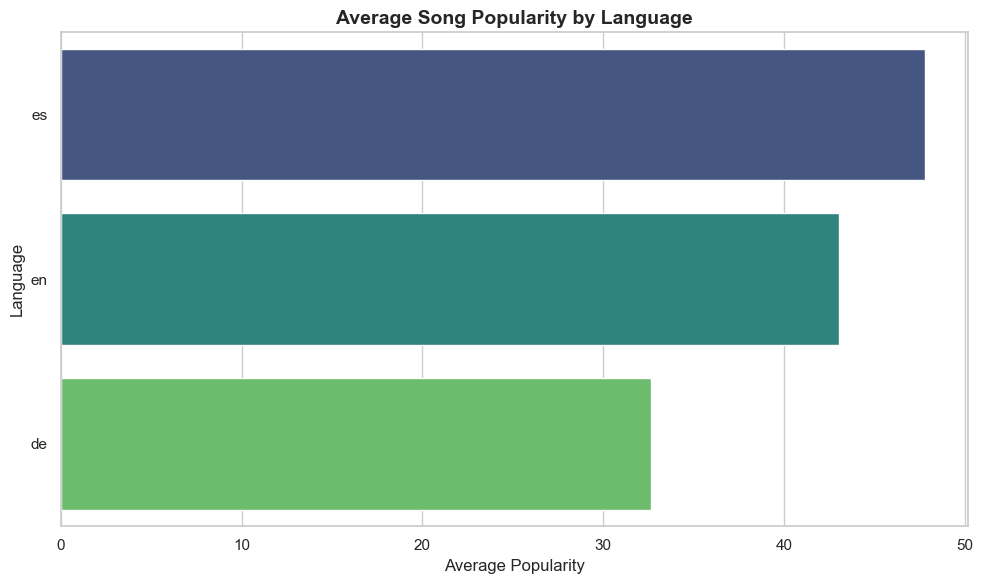

In [21]:
#🎯 USE CASE 3 — Cross-Cultural & Multilingual Song Success

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Step 1: Average popularity by language
lang_popularity = df_clean.groupby('language')['track_popularity'].mean().sort_values(ascending=False)

# Step 2: Count of songs per language (to filter rare ones)
lang_counts = df_clean['language'].value_counts()
lang_popularity = lang_popularity[lang_counts[lang_popularity.index] > 10]  # keep languages with at least 10 songs

# Step 3: Visualization
plt.figure(figsize=(10,6))
sns.barplot(x=lang_popularity.values, y=lang_popularity.index, palette="viridis")
plt.title("Average Song Popularity by Language", fontsize=14, fontweight='bold')
plt.xlabel("Average Popularity")
plt.ylabel("Language")
plt.tight_layout()
plt.show()


MAE: 10.270475055893465
R² Score: 0.5900446220129553


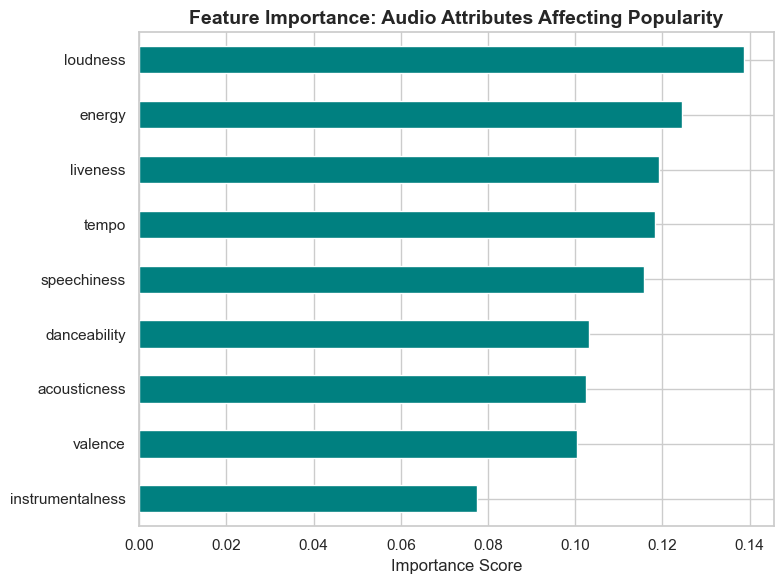

In [22]:
#🎧 USE CASE 4 — Audio Feature Impact on Popularity

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

# Step 1: Select numerical features
audio_features = ['danceability', 'energy', 'loudness', 'speechiness',
                  'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

X = df_clean[audio_features]
y = df_clean['track_popularity']

# Step 2: Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train regression model
rf_reg = RandomForestRegressor(n_estimators=200, random_state=42)
rf_reg.fit(X_train, y_train)

# Step 4: Predict and evaluate
y_pred = rf_reg.predict(X_test)
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

# Step 5: Feature importance visualization
importances = pd.Series(rf_reg.feature_importances_, index=audio_features).sort_values(ascending=True)

plt.figure(figsize=(8,6))
importances.plot(kind='barh', color='teal')
plt.title("Feature Importance: Audio Attributes Affecting Popularity", fontsize=14, fontweight='bold')
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()


C:\Users\BODDAPATI KANCHANA\AppData\Local\Temp\ipykernel_13712\2944014669.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_popularity.index, y=sentiment_popularity.values, palette="coolwarm")


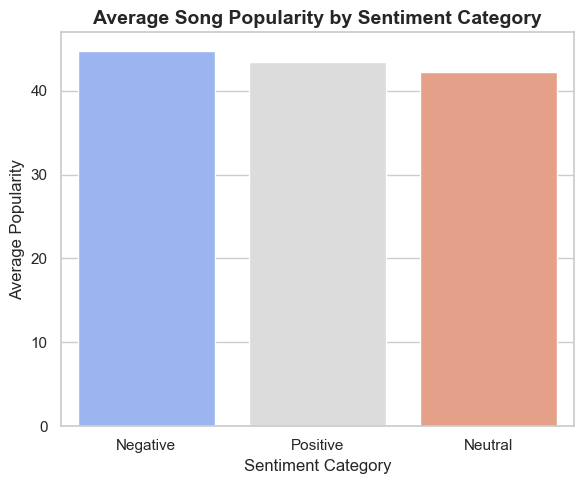

In [23]:
#💬 USE CASE 5 — Sentiment vs. Song Popularity

from textblob import TextBlob

# Step 1: Calculate sentiment polarity
df_clean['sentiment'] = df_clean['lyrics_clean'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Step 2: Categorize sentiment
def label_sentiment(score):
    if score > 0.1:
        return "Positive"
    elif score < -0.1:
        return "Negative"
    else:
        return "Neutral"

df_clean['sentiment_label'] = df_clean['sentiment'].apply(label_sentiment)

# Step 3: Average popularity by sentiment
sentiment_popularity = df_clean.groupby('sentiment_label')['track_popularity'].mean().sort_values(ascending=False)

# Step 4: Visualization
plt.figure(figsize=(6,5))
sns.barplot(x=sentiment_popularity.index, y=sentiment_popularity.values, palette="coolwarm")
plt.title("Average Song Popularity by Sentiment Category", fontsize=14, fontweight='bold')
plt.xlabel("Sentiment Category")
plt.ylabel("Average Popularity")
plt.tight_layout()
plt.show()
